VzW Example: Market Basket Analysis -- EDA visualizations  
sourced from VzW dataset  
pull dates: Jan 01 through Jan 07 2018  
70k observations  

In [1]:
##############################################
# VzW Example: Market Basket Analysis        #
# Alvaro Muir, It Analytics Data Engineering #
# Feb 15 2018                                #
##############################################



SRC_DIR = "../data"
DATASET = "data-01-01-18"
src     = ''.join([SRC_DIR,'/', DATASET,'-65k','.csv.bz2'])
LIMIT   = 70000

In [2]:
df = pd.read_csv(src, compression='bz2', nrows=LIMIT)
print("Total rows including the header: {}".format(df.shape[0] + 1))
df.head()

Total rows including the header: 65036


,a.cust_id,a.invc_num,a.invc_dt,a.sls_dist_chnl_type_cd,c.device_prod_nm,a.trans_type_desc,a.ia_item_class_cd,ia_item_category_cd,a.item_cost_amt,a.sales_qty,a.item_cd,a.eqp_desc,b.item_desc,a.offer_nm,a.discount_cd,a.gross_discount,a.fin_upg_flag,a.curr_contract_term,a.cntrct_tenure_sum
0,1.012498e+09,591764,2017-12-31,M,NaN,RETENTION,PREPAID CARDS,E-PIN CARDS,0.00,1,PREPAY REPLENISH,Prepaid Cards,SUREPAY PREPAY REPLINISHMENTS,NaN,NO DISCOUNT,0.00,N,Not_Applicable,i 25 Mos Plus Past
1,1.052492e+09,187606,2017-12-31,M,NaN,RETENTION,PREPAID CARDS,E-PIN CARDS,0.00,1,PREPAY REPLENISH,Prepaid Cards,SUREPAY PREPAY REPLINISHMENTS,NaN,NO DISCOUNT,0.00,N,Not_Applicable,i 25 Mos Plus Past
2,1.053225e+09,60966,2017-12-31,M,iPhone 6S Plus 32GB Silver,ACQUISITION,PREPAID CARDS,BILL PAY KIOSK,0.00,1,PPCREP,Prepaid Cards,BPK REPLENISHMENT OF PREPAID CARDS,NaN,NO DISCOUNT,0.00,N,Not_Applicable,i 25 Mos Plus Past
3,1.056751e+09,370652,2017-12-31,M,MOTO E4,RETENTION,PREPAID CARDS,E-PIN CARDS,0.00,1,PREPAY REPLENISH,Prepaid Cards,SUREPAY PREPAY REPLINISHMENTS,NaN,NO DISCOUNT,0.00,N,Not_Applicable,i 25 Mos Plus Past
4,2.244133e+08,261551,2017-12-31,M,IPHONE 8 PLUS SILVER 64GB VZ,RETENTION,DATA ACCESSORY,ACCESSORY,20.98,1,MOPHPS62GRY,Portable Power,PPW MOPHIE POWERSTATION 6000 SPACE GREY,BUY ANY 3 CAS CLA CHG PPW SCR 89 99 ACC BUNDLE,WITH DISCOUNT,14.99,N,Not_Applicable,i 25 Mos Plus Past


In [3]:
##
#  General cleanup

# remove NaN columns
df = df.dropna(axis=1, how='all')

# remove date entry columns
df = df.drop([col for col in [col for col in df.columns if col.endswith('_dt' or '_rev' or '_step')]], axis=1)
    
# normalize strings
# todo, reafactor this
for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = df[c].str.lower()
        
# replace nulls
df = df.fillna(0)

# remove any columns that have less than 2 unique responses
for(c) in df.columns:
    if len(df[c].unique()) < 2:
        df = df.drop(c, axis=1)

In [4]:
##
# Data specific


# clean up headers, remove alias-dot
df.columns = [col.replace('a.','') for col in df.columns.tolist()]
df.columns = [col.replace('b.','') for col in df.columns.tolist()]
df.columns = [col.replace('c.','') for col in df.columns.tolist()]

# convert cust id's and invoice numbers to strings
df['cust_id'] = df['cust_id'].astype('str').map(lambda x: x.rstrip('0').rstrip('.'))
df['invc_num'] = df['invc_num'].astype('str')
df['device_prod_nm'] = df['device_prod_nm'].astype('str')

# remove rows that contain tablets or IP devices
to_remove = ['apple tablet', 'android tablet', 'windows tablet',
             'verizon wireless home phone','windows tablet',
             'ip virtual devices']

df = df[~df['eqp_desc'].isin(to_remove)]

df.head()

,cust_id,invc_num,sls_dist_chnl_type_cd,device_prod_nm,trans_type_desc,ia_item_class_cd,ia_item_category_cd,item_cost_amt,sales_qty,item_cd,eqp_desc,item_desc,offer_nm,discount_cd,gross_discount,fin_upg_flag,curr_contract_term,cntrct_tenure_sum
0,1012498217,591764,m,0,retention,prepaid cards,e-pin cards,0.00,1,prepay replenish,prepaid cards,surepay prepay replinishments,0,no discount,0.00,n,not_applicable,i 25 mos plus past
1,1052492345,187606,m,0,retention,prepaid cards,e-pin cards,0.00,1,prepay replenish,prepaid cards,surepay prepay replinishments,0,no discount,0.00,n,not_applicable,i 25 mos plus past
2,1053225113,60966,m,iphone 6s plus 32gb silver,acquisition,prepaid cards,bill pay kiosk,0.00,1,ppcrep,prepaid cards,bpk replenishment of prepaid cards,0,no discount,0.00,n,not_applicable,i 25 mos plus past
3,1056751445,370652,m,moto e4,retention,prepaid cards,e-pin cards,0.00,1,prepay replenish,prepaid cards,surepay prepay replinishments,0,no discount,0.00,n,not_applicable,i 25 mos plus past
4,224413346,261551,m,iphone 8 plus silver 64gb vz,retention,data accessory,accessory,20.98,1,mophps62gry,portable power,ppw mophie powerstation 6000 space grey,buy any 3 cas cla chg ppw scr 89 99 acc bundle,with discount,14.99,n,not_applicable,i 25 mos plus past


In [5]:
print('unique counts')
pd.DataFrame(data={'customers': [len(df['cust_id'].unique())], 
                   'invoices': [len(df['invc_num'].unique())], 
                   'devices': [len(df['device_prod_nm'].unique())],
                   'items': [len(df['item_desc'].unique())],
                  })

print(pd.DataFrame(df['device_prod_nm'].unique()))

unique counts
                                    0
0                                   0
1          iphone 6s plus 32gb silver
2                             moto e4
3        iphone 8 plus silver 64gb vz
4           samsung galaxy tab e 32gb
5             samsung galaxy s8 black
6           samsung galaxy j3 eclipse
7           iphone 5s space gray 16gb
8       samsung note 8 midnight black
9            samsung galaxy s8 silver
10              iphone 8 gold 64gb vz
11             ipad air 2 64gb s gray
12            iphone 6 plus 64gb gold
13        iphone 8 space gray 64gb vz
14   verizon ellipsis jetpack mhs900l
15       iphone 7 plus rose gold 32gb
16      samsung galaxy s8 orchid gray
17       iphone x space gray 256gb vz
18                       lg exalt lte
19         samsung note 8 orchid gray
20           ellipsis jetpack mhs800l
21              iphone 7 silver 128gb
22      iphone 6 plus 64gb space gray
23               iphone 7 black 128gb
24      sam galaxy j1 pp subsidy loc

In [6]:
# let's try to bin the devices. This should be done in ETL

df['device_prod_nm'] = df[['device_prod_nm']].replace('0', 'None')

df['device_abbr'] = df['device_prod_nm'].map(lambda x:
    ' '.join([el for el in str(x).split() if (el not in ['the', 'new'])][:5])
)


df['device_abbr'] = df['device_abbr'].map(lambda x: ' '.join(x.split()[2:5]) if any(el in['the', 'all', 'new'] for el in str(x).split()) else x)
df['device_abbr'] = df['device_abbr'].map(lambda x: ' '.join(x.split()[1:]) if any(el in ['prepaid', 'prepay'] for el in [str(x).split()[0]]) else x)
df['device_abbr'] = df['device_abbr'].map(lambda x: ' '.join(el for el in x.split('-') if el is not '-'))
df['device_abbr'] = df['device_abbr'].map(lambda x: 'apple watch ' + ' '.join(str(x).split()[1:]) if str(x).split()[0] == 'aplwatch' else x)
df['device_abbr'] = df['device_abbr'].map(lambda x: 'google ' + x if any(el in ['nexus', 'pixel'] for el in [str(x).split()[0]]) else x)
df['device_abbr'] = df['device_abbr'].map(lambda x: 'iphone ' + x if any(el in ['se', 'iphone8'] for el in [str(x).split()[0]]) else x)
df['device_abbr'] = df['device_abbr'].map(lambda x: 'lg ' + x if any(el in ['k8', 'g'] for el in [str(x).split()[0]]) else x)
df['device_abbr'] = df['device_abbr'].map(lambda x: 'motorola ' + x if any(el in ['moto', 'droid'] for el in [str(x).split()[0]]) else x)
df['device_abbr'] = df['device_abbr'].map(lambda x: 'samsung ' + ' '.join(str(x).split()[1:]) if any(el in ['sam', 'sm', 'galaxys8plus', 'galaxy'] for el in [str(x).split()[0]]) else x)
df['device_abbr'] = df['device_abbr'].map(lambda x: 'verizon ' + x if any(el in ['ellipsis', 'mifi', 'vz'] for el in [str(x).split()[0]]) else x)
df['device_abbr'] = df['device_abbr'].map(lambda x: 'htc ' + x if any(el in ['one', 'desire'] for el in [str(x).split()[0]]) else x)
                                                                                
df['device_abbr'] = df['device_abbr'].map(lambda x: ' '.join(x.split()[:3]))

df['device_abbr'] = df['device_abbr'].map(lambda x: ' '.join(x.split()[1:] + [x.split()[0]]) if str(x).split()[0][0].isdigit() else x)

df['device_abbr'] = df['device_abbr'].map(lambda x: ' '.join(str(x).split()[:3]) if 
                      len(str(x).split()) == 3 
                      and str(x).split()[0] == 'iphone'
                      and str(x).split()[2] == 'plus'
                      else x )

df['device_abbr'] = df['device_abbr'].map(lambda x: ' '.join(str(x).split()[:2]) if 
                      len(str(x).split()) == 3 
                      and str(x).split()[0] == 'iphone'
                      and str(x).split()[2] != 'plus'
                      else x )

df['device_abbr'] = df['device_abbr'].map(lambda x: 'apple ' + x if any(el in ['iphone', 'ipad'] for el in [str(x).split()[0]]) 
                                          else x)
  

# first two description words for sake of model development
df['device_type'] = df['device_abbr'].map(lambda x: ' '.join(str(x).split()[:2]) if 
                                          any(el in ['iphone', 'ipad', 'watch', 'galaxy', 'droid', 'tab'] for el in str(x).split())
                                          else ' '.join([str(x).split()[0], 'device']))

df['device_type'] = df[['device_type']].replace('None device', 'None')

cols = list(df.columns.values)
df = df[cols[:3] + ['device_prod_nm', 'device_abbr', 'device_type'] + cols[4:-2]]

print(pd.DataFrame(df['device_abbr'].unique()))

                               0
0                           None
1           apple iphone 6s plus
2               motorola moto e4
3            apple iphone 8 plus
4             samsung galaxy tab
5              samsung galaxy s8
6              samsung galaxy j3
7                apple iphone 5s
8                 samsung note 8
9                 apple iphone 8
10              apple ipad air 2
11           apple iphone 6 plus
12      verizon ellipsis jetpack
13           apple iphone 7 plus
14                apple iphone x
15                  lg exalt lte
16                apple iphone 7
17             samsung galaxy j1
18                lg g6 platinum
19               motorola moto z
20                google pixel 2
21             samsung galaxy s6
22             samsung galaxy s7
23                apple iphone 6
24              motorola moto z2
25               apple iphone 6s
26             samsung galaxy j7
27               lg optimus zone
28                      lg k20 v
29        

In [7]:
# let's get a new view of distinct counts

purchases = df[['cust_id','invc_num', 'device_prod_nm', 'device_abbr', 'device_type', 'item_desc', 'eqp_desc', 'sales_qty']]
customers = purchases['cust_id'].unique()
invoices = purchases['invc_num'].unique()
devices  = purchases['device_prod_nm'].unique()
devices_abbr = purchases['device_abbr'].unique()
devices_types = purchases['device_type'].unique()
items = [' '.join(i.split()) for i in purchases.item_desc.unique()] # there's weird spaces in there\
item_types = purchases['eqp_desc'].unique()

print('unique counts')
pd.DataFrame(data={'customers': [len(customers)], 
                   'invoices': [len(invoices)], 
                   'devices': [len(devices)],
                   'devices abbr': [len(devices_abbr)],
                   'devices types': [len(devices_types)],
                   'items': [len(items)],
                   'items_types': [len(item_types)]
                  })

unique counts


,customers,devices,devices abbr,devices types,invoices,items,items_types
0,28984,618,203,52,34005,1308,33


In [8]:
df.head()

,cust_id,invc_num,sls_dist_chnl_type_cd,device_prod_nm,device_abbr,device_type,trans_type_desc,ia_item_class_cd,ia_item_category_cd,item_cost_amt,sales_qty,item_cd,eqp_desc,item_desc,offer_nm,discount_cd,gross_discount,fin_upg_flag,curr_contract_term,cntrct_tenure_sum
0,1012498217,591764,m,None,None,None,retention,prepaid cards,e-pin cards,0.00,1,prepay replenish,prepaid cards,surepay prepay replinishments,0,no discount,0.00,n,not_applicable,i 25 mos plus past
1,1052492345,187606,m,None,None,None,retention,prepaid cards,e-pin cards,0.00,1,prepay replenish,prepaid cards,surepay prepay replinishments,0,no discount,0.00,n,not_applicable,i 25 mos plus past
2,1053225113,60966,m,iphone 6s plus 32gb silver,apple iphone 6s plus,apple iphone,acquisition,prepaid cards,bill pay kiosk,0.00,1,ppcrep,prepaid cards,bpk replenishment of prepaid cards,0,no discount,0.00,n,not_applicable,i 25 mos plus past
3,1056751445,370652,m,moto e4,motorola moto e4,motorola device,retention,prepaid cards,e-pin cards,0.00,1,prepay replenish,prepaid cards,surepay prepay replinishments,0,no discount,0.00,n,not_applicable,i 25 mos plus past
4,224413346,261551,m,iphone 8 plus silver 64gb vz,apple iphone 8 plus,apple iphone,retention,data accessory,accessory,20.98,1,mophps62gry,portable power,ppw mophie powerstation 6000 space grey,buy any 3 cas cla chg ppw scr 89 99 acc bundle,with discount,14.99,n,not_applicable,i 25 mos plus past


In [9]:
purchases.head()

,cust_id,invc_num,device_prod_nm,device_abbr,device_type,item_desc,eqp_desc,sales_qty
0,1012498217,591764,None,None,None,surepay prepay replinishments,prepaid cards,1
1,1052492345,187606,None,None,None,surepay prepay replinishments,prepaid cards,1
2,1053225113,60966,iphone 6s plus 32gb silver,apple iphone 6s plus,apple iphone,bpk replenishment of prepaid cards,prepaid cards,1
3,1056751445,370652,moto e4,motorola moto e4,motorola device,surepay prepay replinishments,prepaid cards,1
4,224413346,261551,iphone 8 plus silver 64gb vz,apple iphone 8 plus,apple iphone,ppw mophie powerstation 6000 space grey,portable power,1


In [10]:
# here's our new sales matrix for analysis

sales_matrix = (purchases[['device_type', 'eqp_desc', 'sales_qty']]
          .groupby(['device_type', 'eqp_desc'])['sales_qty']
          .sum().unstack().reset_index().fillna(0)
          .set_index('device_type'))

sales_matrix = sales_matrix.astype(int)
sales_matrix = sales_matrix.dropna(axis=0, how='all')
sales_matrix = sales_matrix.dropna(axis=1, how='all')

sales_matrix.head()

eqp_desc,accessory - other,antenna,automotive devices,basic,battery,bluetooth,cantenna devices,case,charger,combo pack,...,other connected devices,other tablet,portable power,prepaid cards,smart accessory,smartwatch accessory,smartwatch wearables,speakers,usb / pc card devices,vhcl power chg
device_type,,,,,,,,,,,,,,,,,,,,,
None,299,5,328,243,1,224,1,602,273,19,...,0,0,120,698,106,10,33,46,0,195
alcatel device,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
apple ipad,48,0,0,0,1,43,0,284,23,1,...,0,4,43,10,28,0,4,1,0,29
apple iphone,627,2,0,32,2,720,0,4099,1189,56,...,0,10,2022,658,539,10,0,98,0,1390
apple watch,6,0,0,11,0,29,0,12,7,0,...,0,0,11,1,5,0,8,4,0,14


In [11]:
sales_matrix.describe()

eqp_desc,accessory - other,antenna,automotive devices,basic,battery,bluetooth,cantenna devices,case,charger,combo pack,...,other connected devices,other tablet,portable power,prepaid cards,smart accessory,smartwatch accessory,smartwatch wearables,speakers,usb / pc card devices,vhcl power chg
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,42.115385,0.461538,8.000000,27.134615,0.192308,24.250000,0.076923,343.442308,60.615385,2.846154,...,0.307692,0.346154,66.942308,58.038462,35.288462,0.596154,12.019231,6.307692,0.173077,126.384615
std,124.220338,1.212056,46.587047,107.277728,0.561457,104.757774,0.435942,1511.768908,214.639612,9.289219,...,2.218801,1.506647,304.094891,164.651380,140.335220,2.153516,73.838321,20.932701,1.115333,548.267044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.500000,0.000000,0.000000,0.250000,0.000000,1.250000,0.000000,12.750000,5.250000,0.000000,...,0.000000,0.000000,1.250000,5.500000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,627.000000,5.000000,328.000000,560.000000,2.000000,720.000000,3.000000,10205.000000,1189.000000,56.000000,...,16.000000,10.000000,2022.000000,698.000000,861.000000,10.000000,532.000000,98.000000,8.000000,3720.000000


In [12]:
for c in sales_matrix.columns:
    if sales_matrix[c].mean() < sales_matrix.shape[0]:
        sales_matrix = sales_matrix.drop([c], axis=1)

sales_matrix = sales_matrix.T

for c in sales_matrix.columns:
    if sales_matrix[c].mean() < sales_matrix.shape[0]:
        sales_matrix = sales_matrix.drop([c], axis=1)
    
sales_matrix = sales_matrix.T

In [13]:
sales_matrix.describe()

eqp_desc,case,charger,display protector,portable power,prepaid cards,vhcl power chg
count,16.000000,16.00000,16.00000,16.000000,16.000000,16.000000
mean,1112.125000,196.18750,1013.56250,217.125000,186.875000,409.062500
std,2619.182388,358.21506,2313.23139,528.827997,258.064042,948.108114
min,0.000000,0.00000,0.00000,0.000000,1.000000,0.000000
25%,47.250000,6.00000,33.50000,5.750000,15.250000,14.000000
50%,203.500000,56.50000,96.00000,22.000000,54.500000,47.000000
75%,596.750000,148.00000,484.00000,111.000000,322.750000,303.250000
max,10205.000000,1189.00000,7952.00000,2022.000000,698.000000,3720.000000


In [14]:
sales_matrix.T.describe()

device_type,None,apple ipad,apple iphone,apple watch,asus device,cymbal device,google device,htc device,kyocera device,lg device,motorola device,motorola droid,samsung device,samsung galaxy,verizon device,zte device
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,392.333333,107.166667,2506.000000,11.333333,36.000000,9.500000,205.333333,14.50000,18.833333,179.000000,346.000000,66.333333,340.333333,4064.000000,52.333333,10.833333
std,232.450138,126.160876,1961.047577,7.339391,45.418058,23.270153,199.216131,18.90767,23.693178,154.230996,182.855134,32.035397,327.752752,4105.672223,42.556629,26.049312
min,120.000000,10.000000,658.000000,1.000000,1.000000,0.000000,17.000000,2.00000,1.000000,26.000000,145.000000,18.000000,20.000000,626.000000,9.000000,0.000000
25%,214.500000,24.500000,1239.250000,8.000000,6.250000,0.000000,76.250000,4.50000,1.250000,71.250000,217.250000,46.500000,108.750000,919.250000,23.250000,0.000000
50%,369.500000,36.000000,1706.000000,11.500000,11.500000,0.000000,123.500000,7.00000,8.000000,120.500000,304.000000,74.000000,213.500000,2351.500000,43.000000,0.000000
75%,568.000000,201.250000,3579.750000,13.500000,62.500000,0.000000,326.000000,13.25000,31.250000,310.750000,480.750000,88.000000,611.500000,6894.000000,70.250000,0.750000
max,698.000000,284.000000,5678.000000,23.000000,108.000000,57.000000,514.000000,52.00000,58.000000,378.000000,595.000000,102.000000,777.000000,10205.000000,123.000000,64.000000


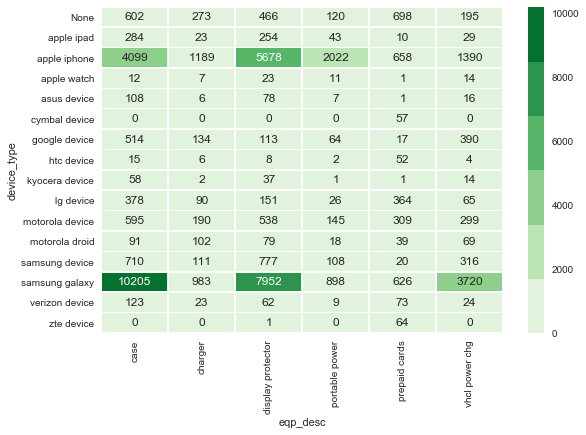

In [15]:
%matplotlib inline
import seaborn as sns
sns.set()

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(sales_matrix, cmap=sns.color_palette("Greens"), annot=True, fmt="d", linewidths=.5, ax=ax)

plt.show()
